# Пример использования PaperResearchAgent

Этот ноутбук демонстрирует работу с агентом для поиска и извлечения структурированной информации об AutoML фреймворках из научных статей.


## 1. Импорт необходимых библиотек


In [1]:
# Автоперезагрузка модулей при изменении кода
%load_ext autoreload
%autoreload 2

from mas_automl.agents import PaperResearchAgent
import arxiv
import asyncio


## 2. Инициализация агента

Создаём экземпляр `PaperResearchAgent`, который будет искать статьи и извлекать структурированную информацию об AutoML фреймворках.


In [2]:
# Создаём агента в обычном режиме
agent = PaperResearchAgent()
test_agent = PaperResearchAgent(test_mode=True)


## 3. Поиск и извлечение информации о фреймворках

Агент использует LangGraph для оркестрации процесса:
1. Поиск статей в arXiv
2. Извлечение структурированной информации о фреймворках из найденных статей с помощью LLM
3. Объединение информации о фреймворках из разных статей

Для каждого найденного фреймворка извлекается следующая информация:
- **Описание** — назначение и основные возможности
- **Преимущества** — уникальные особенности фреймворка
- **Сильные стороны** — в чем фреймворк преуспевает
- **Слабые стороны** — ограничения и недостатки
- **Типы данных** — с какими типами данных работает (tabular, image, text, multimodal и т.д.)
- **Что не поддерживает** — явные ограничения и неподдерживаемые функции
- **Результаты в бенчмарках** — места в рейтингах, метрики, типы датасетов
- **Код из статьи** — примеры использования и API
- **Ссылки на репозитории** — GitHub, GitLab и другие ссылки

### 3.1. Формирование запросов для поиска статей о фреймворках

Для поиска статей о фреймворках, бенчмарках и тестировании AutoML систем (например, как "AMLB: an AutoML Benchmark"), включите в запрос соответствующие ключевые слова:
- `framework`, `frameworks`
- `benchmark`, `benchmarking`
- `evaluation`, `evaluating`
- `tool`, `tools`
- `system`, `systems`
- `library`, `libraries`
- `platform`, `platforms`


## 3.3. Поиск новых статей (сортировка по дате)

Для поиска только новых статей можно использовать сортировку по дате подачи и фильтрацию по времени:

- `sort_by=arxiv.SortCriterion.SubmittedDate` - сортировка по дате подачи (новые сначала)
- `days_back=N` - фильтр: только статьи за последние N дней

Это особенно полезно для поиска свежих публикаций об AutoML фреймворках и бенчмарках.


### Доступные варианты сортировки:

- `arxiv.SortCriterion.Relevance` (по умолчанию) - сортировка по релевантности запросу
- `arxiv.SortCriterion.SubmittedDate` - сортировка по дате подачи статьи (новые сначала)
- `arxiv.SortCriterion.LastUpdatedDate` - сортировка по дате последнего обновления

### Примеры использования фильтра по дате:

- `days_back=30` - только статьи за последний месяц
- `days_back=90` - только статьи за последние 3 месяца  
- `days_back=365` - только статьи за последний год


In [3]:
# Пример: поиск новых статей об AutoML фреймворках за последние 2 года
# Сортировка по дате подачи (новые сначала) и фильтр: только статьи за последние 730 дней
query_new = "AutoML framework benchmark library evaluation"
result_new = await agent.handle(
    query_new,
    sort_by=arxiv.SortCriterion.SubmittedDate,
    days_back=365 * 2  # Только статьи за последние 2 года
)

print(f"Запрос: {result_new.get('query', '')}")
print(f"Найдено статей: {len(result_new.get('papers', []))}")
print(f"Найдено уникальных фреймворков: {len(result_new.get('frameworks', []))}")
print("\nНайденные статьи (отсортированы по дате):")
for i, paper in enumerate(result_new.get('papers', []), 1):
    print(f"\n{i}. {paper.get('title', 'N/A')}")
    print(f"   Дата публикации: {paper.get('published_date', 'N/A')}")
    print(f"   URL: {paper.get('url', 'N/A')}")


[DEBUG] Extracting frameworks from PDF (length: 180427 chars)
[DEBUG] LLM response for framework extraction: ```json
{
  "frameworks": [
    {
      "name": "AutoML-Agent",
      "description": "A novel multi-agent framework tailored for full-pipeline AutoML, i.e., from data retrieval to model deployment. It takes user’s task descriptions, facilitates collaboration between specialized LLM agents, and delivers deployment-ready models.",
      "advantages": [
        "Retrieval-augmented planning strategy to enhance exploration to search for more optimal plans",
        "Decomposes each plan into sub-tas...
[DEBUG] Extracted 12 frameworks (Pydantic parser, attempt 1)
[DEBUG] Extracted 12 frameworks with detailed info
[DEBUG] Extracting frameworks from PDF (length: 111448 chars)
[DEBUG] LLM response for framework extraction: ```json
{
  "frameworks": [
    {
      "name": "AutoGluon-Multimodal (AutoMM)",
      "description": "An open-source AutoML library designed specifically for multimo

In [4]:
# Показываем структурированную информацию о найденных фреймворках
frameworks = result_new.get('frameworks', [])
print(f"\n\n=== СТРУКТУРИРОВАННАЯ ИНФОРМАЦИЯ О ФРЕЙМВОРКАХ ===\n")
print(f"Всего найдено уникальных фреймворков: {len(frameworks)}\n")

for i, fw in enumerate(frameworks, 1):
    print(f"{'='*80}")
    print(f"{i}. {fw.get('name', 'N/A')}")
    print(f"{'='*80}")
    
    # Описание
    description = fw.get('description', '')
    if description:
        print(f"\n📝 Описание:")
        print(f"   {description}")
    
    # Преимущества
    advantages = fw.get('advantages', [])
    if advantages:
        print(f"\n✅ Преимущества:")
        for adv in advantages:
            print(f"   • {adv}")
    
    # Сильные стороны
    strengths = fw.get('strengths', [])
    if strengths:
        print(f"\n💪 Сильные стороны:")
        for strength in strengths:
            print(f"   • {strength}")
    
    # Слабые стороны
    weaknesses = fw.get('weaknesses', [])
    if weaknesses:
        print(f"\n⚠️  Слабые стороны:")
        for weakness in weaknesses:
            print(f"   • {weakness}")
    
    # Типы данных
    data_types = fw.get('supported_data_types', [])
    if data_types:
        print(f"\n📊 Типы данных:")
        print(f"   {', '.join(data_types)}")
    
    # Что не поддерживает
    unsupported = fw.get('unsupported_features', [])
    if unsupported:
        print(f"\n❌ Что не поддерживает:")
        for feature in unsupported:
            print(f"   • {feature}")
    
    # Результаты в бенчмарках
    benchmarks = fw.get('benchmark_results', [])
    if benchmarks:
        print(f"\n🏆 Результаты в бенчмарках:")
        for benchmark in benchmarks:
            print(f"   • {benchmark}")
    
    # Код из статьи
    code_snippets = fw.get('code_snippets', [])
    if code_snippets:
        print(f"\n💻 Код из статьи:")
        for code in code_snippets[:3]:  # Показываем первые 3 примера
            # Очищаем код от markdown форматирования (убираем ``` в начале и конце)
            cleaned_code = code.strip()
            
            # Убираем открывающие ``` и указание языка (например, ```python или ```json)
            if cleaned_code.startswith('```'):
                # Находим конец первой строки с ``` (может быть ```python или просто ```)
                first_newline = cleaned_code.find('\n')
                if first_newline != -1:
                    # Пропускаем всю первую строку (```python или ```)
                    cleaned_code = cleaned_code[first_newline + 1:].lstrip()
                else:
                    # Если нет переноса строки, просто убираем ``` и все что после до конца
                    cleaned_code = cleaned_code[3:].strip()
                    # Если после ``` было указание языка, убираем его
                    if cleaned_code.startswith(('python', 'json', 'javascript', 'java', 'cpp', 'c', 'go', 'rust')):
                        space_idx = cleaned_code.find(' ')
                        if space_idx != -1:
                            cleaned_code = cleaned_code[space_idx + 1:]
                        else:
                            cleaned_code = ''
            
            # Убираем закрывающие ```
            cleaned_code = cleaned_code.rstrip()
            if cleaned_code.endswith('```'):
                cleaned_code = cleaned_code[:-3].rstrip()
            
            # Выводим код с отступом, без дополнительных кавычек
            code_preview = cleaned_code[:300] + ('...' if len(cleaned_code) > 300 else '')
            for line in code_preview.split('\n'):
                print(f"   {line}")
    
    # Репозитории
    repos = fw.get('repository_urls', [])
    if repos:
        print(f"\n🔗 Репозитории:")
        for repo in repos:
            print(f"   • {repo}")
    
    # Ссылки на статьи
    paper_urls = fw.get('paper_urls', [])
    if paper_urls:
        print(f"\n📄 Статьи:")
        for url in paper_urls:
            print(f"   • {url}")
    
    print("\n")




=== СТРУКТУРИРОВАННАЯ ИНФОРМАЦИЯ О ФРЕЙМВОРКАХ ===

Всего найдено уникальных фреймворков: 51

1. AutoML-Agent

📝 Описание:
   A novel multi-agent framework tailored for full-pipeline AutoML, i.e., from data retrieval to model deployment. It takes user’s task descriptions, facilitates collaboration between specialized LLM agents, and delivers deployment-ready models.

✅ Преимущества:
   • Retrieval-augmented planning strategy to enhance exploration to search for more optimal plans
   • Decomposes each plan into sub-tasks (e.g., data preprocessing and neural network design) each of which is solved by a specialized agent we build via prompting executing in parallel, making the search process more efficient.
   • Multi-stage verification to verify executed results and guide the code generation LLM in implementing successful solutions.
   • Task-agnostic AutoML framework that spans from data retrieval to model deployment.
   • Role-specific plan decomposition and prompting-based plan exec

In [5]:
# Также можно посмотреть информацию о фреймворках по статьям
print("=== ИНФОРМАЦИЯ О ФРЕЙМВОРКАХ ПО СТАТЬЯМ ===\n")
paper_frameworks = result_new.get('paper_frameworks', [])
for i, paper_data in enumerate(paper_frameworks, 1):
    print(f"{i}. {paper_data.get('title', 'N/A')}")
    frameworks = paper_data.get('frameworks', [])
    if frameworks:
        print(f"   Найдено фреймворков: {len(frameworks)}")
        for fw in frameworks:
            fw_name = fw.get('name', 'N/A') if isinstance(fw, dict) else getattr(fw, 'name', 'N/A')
            print(f"   • {fw_name}")
    else:
        print("   Фреймворки не найдены")
    print()


=== ИНФОРМАЦИЯ О ФРЕЙМВОРКАХ ПО СТАТЬЯМ ===

1. AutoML-Agent: A Multi-Agent LLM Framework for Full-Pipeline AutoML
   Найдено фреймворков: 12
   • AutoML-Agent
   • AutoML-GPT
   • Prompt2Model
   • HuggingGPT
   • CAAFE
   • MLCopilot
   • AgentHPO
   • Data Interpreter
   • DS-Agent
   • SELA
   • Agent K
   • AutoMMLab

2. AutoGluon-Multimodal (AutoMM): Supercharging Multimodal AutoML with Foundation Models
   Найдено фреймворков: 10
   • AutoGluon-Multimodal (AutoMM)
   • AutoKeras
   • Auto-Sklearn
   • TPOT
   • H2O AutoML
   • FLAML
   • LightAutoML
   • Quick-Tune
   • TabPFN
   • OptFormer

3. Confidence Interval Estimation of Predictive Performance in the Context of AutoML
   Найдено фреймворков: 8
   • JADBio
   • BBC
   • BBC-F
   • MABT
   • BT
   • HM
   • DL
   • NB

4. Towards Autonomous Cybersecurity: An Intelligent AutoML Framework for Autonomous Intrusion Detection
   Найдено фреймворков: 3
   • Tabular Variational Auto-Encoder (TVAE)
   • Optimized Confidence-based 

## 4. Анализ статей по фреймворкам за последние 10 лет

Анализируем количество статей по фреймворкам за последние 10 лет в разрезе каждого года и подсчитываем сколько из них содержат ссылки на GitHub.

**Примечание:** По умолчанию агент обрабатывает 50 статей (вместо стандартных 6) для более полного анализа. Это значение можно увеличить до 100-200 статей, но учтите, что обработка каждой статьи требует времени (особенно извлечение информации из PDF), поэтому анализ может занять значительное время.


In [ ]:
# Анализ статей по фреймворкам за последние 10 лет
from datetime import datetime, timedelta
from collections import defaultdict
import re

async def analyze_frameworks_by_year(years_back=10):
    """
    Анализирует статьи по фреймворкам за последние N лет.
    Группирует по годам и подсчитывает статьи с GitHub ссылками.
    
    Использует один запрос за весь период для получения большего количества статей,
    затем группирует результаты по годам.
    """
    # Создаём агента
    agent = PaperResearchAgent()
    
    # Словари для хранения статистики
    papers_by_year = defaultdict(list)
    papers_with_github_by_year = defaultdict(int)
    total_papers_by_year = defaultdict(int)
    
    # Запрос для поиска статей о фреймворках
    query = "AutoML framework benchmark library evaluation tool system"
    
    current_year = datetime.now().year
    start_year = current_year - years_back + 1
    days_back = years_back * 365
    
    # Увеличиваем количество статей для более полного анализа
    # Для анализа за 10 лет используем 50-100 статей вместо дефолтных 6
    max_results = 500
    
    print(f"Анализ статей за период: {start_year} - {current_year}")
    print(f"Выполняем поиск статей за последние {days_back} дней...")
    print(f"Максимальное количество статей для анализа: {max_results}")
    print("=" * 80)
    
    try:
        # Делаем один запрос за весь период
        # Используем SubmittedDate для сортировки по дате
        result = await agent.handle(
            query,
            sort_by=arxiv.SortCriterion.Relevance,
            days_back=days_back,
            max_results=max_results  # Увеличиваем количество статей для анализа
        )
        
        papers = result.get('papers', [])
        paper_frameworks = result.get('paper_frameworks', [])
        
        print(f"\nВсего найдено статей: {len(papers)}")
        print(f"Всего обработано статей с фреймворками: {len(paper_frameworks)}")
        
        # Создаём словарь для быстрого поиска фреймворков по названию статьи
        frameworks_by_paper_title = {}
        for paper_fw in paper_frameworks:
            title = paper_fw.get('title', '')
            frameworks_by_paper_title[title] = paper_fw.get('frameworks', [])
        
        # Группируем статьи по годам и проверяем наличие GitHub ссылок
        for paper in papers:
            published_date = paper.get('published_date', '')
            if not published_date:
                continue
            
            # Парсим дату публикации
            paper_date = None
            try:
                # Убираем timezone для парсинга
                date_str = published_date.split('+')[0].split('.')[0].strip()
                paper_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
            except:
                try:
                    # Пробуем другой формат
                    paper_date = datetime.fromisoformat(published_date.replace('Z', '+00:00'))
                except:
                    continue
            
            if paper_date is None:
                continue
            
            year = paper_date.year
            
            # Проверяем, попадает ли год в нужный диапазон
            if start_year <= year <= current_year:
                papers_by_year[year].append(paper)
                total_papers_by_year[year] = total_papers_by_year.get(year, 0) + 1
                
                # Проверяем наличие GitHub ссылок в фреймворках этой статьи
                paper_title = paper.get('title', '')
                frameworks = frameworks_by_paper_title.get(paper_title, [])
                
                has_github = False
                for fw in frameworks:
                    repos = fw.get('repository_urls', [])
                    # Проверяем наличие GitHub ссылок
                    for repo in repos:
                        if repo and ('github.com' in repo.lower() or 'github.io' in repo.lower()):
                            has_github = True
                            break
                    if has_github:
                        break
                
                if has_github:
                    papers_with_github_by_year[year] = papers_with_github_by_year.get(year, 0) + 1
        
        # Выводим промежуточную статистику
        print("\nСтатистика по годам:")
        for year in sorted(papers_by_year.keys()):
            total = total_papers_by_year.get(year, 0)
            github = papers_with_github_by_year.get(year, 0)
            print(f"  {year}: {total} статей, {github} с GitHub")
        
    except Exception as e:
        print(f"Ошибка при выполнении анализа: {e}")
        import traceback
        traceback.print_exc()
    
    return {
        'papers_by_year': dict(papers_by_year),
        'papers_with_github_by_year': dict(papers_with_github_by_year),
        'total_papers_by_year': dict(total_papers_by_year)
    }

# Запускаем анализ
analysis_result = await analyze_frameworks_by_year(years_back=10)


Анализ статей за период: 2016 - 2025
Выполняем поиск статей за последние 3650 дней...
Максимальное количество статей для анализа: 500
[DEBUG] Extracting frameworks from PDF (length: 19813 chars)
[DEBUG] LLM response for framework extraction: ```json
{
  "frameworks": [
    {
      "name": "Auto-WEKA",
      "description": "Uses Bayesian optimization to select and tune the algorithms in a machine learning pipeline based on WEKA (Hall et al., 2009).",
      "advantages": [],
      "strengths": [],
      "weaknesses": [
        "Is showing signs of overfitting when running longer, especially on multi-class problems.",
        "Has the poorest performance out of the tested AutoML packages under the tested conditions."
      ],
      "su...
[DEBUG] Extracted 8 frameworks (Pydantic parser, attempt 1)
[DEBUG] Extracted 8 frameworks with detailed info
[DEBUG] Extracting frameworks from PDF (length: 180427 chars)
[DEBUG] LLM response for framework extraction: ```json
{"frameworks": [
  {
    "n

Multiple definitions in dictionary at byte 0x2995d for key /Rotate


[DEBUG] Extracting frameworks from PDF (length: 40537 chars)
[DEBUG] LLM response for framework extraction: ```json
{
  "frameworks": [
    {
      "name": "auto-sklearn",
      "description": "An AutoML system that aims for high predictive performance, thereby generating ensembles that consist almost exclusively of black-box models.",
      "advantages": [],
      "strengths": [],
      "weaknesses": [],
      "supported_data_types": [],
      "unsupported_features": [],
      "benchmark_results": [],
      "code_snippets": [],
      "repository_urls": [],
      "paper_url": ""
    },
    {
      "na...
[DEBUG] Extracted 8 frameworks (Pydantic parser, attempt 1)
[DEBUG] Extracted 8 frameworks with detailed info
[DEBUG] Extracting frameworks from PDF (length: 38339 chars)
[DEBUG] LLM response for framework extraction: ```json
{
  "frameworks": [
    {
      "name": "Japanese-Alpaca",
      "description": "Fine-tuned with the instruction data translated from English Alpaca via GPT-3.5",

In [ ]:
# Выводим результаты анализа
print("\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ АНАЛИЗА СТАТЕЙ ПО ФРЕЙМВОРКАМ ЗА ПОСЛЕДНИЕ 10 ЛЕТ")
print("=" * 80)
print()

total_papers_by_year = analysis_result['total_papers_by_year']
papers_with_github_by_year = analysis_result['papers_with_github_by_year']

# Сортируем годы
years = sorted(total_papers_by_year.keys())

# Выводим таблицу
print(f"{'Год':<10} {'Всего статей':<15} {'С GitHub':<15} {'% с GitHub':<15}")
print("-" * 60)

total_all = 0
total_github = 0

for year in years:
    total = total_papers_by_year.get(year, 0)
    github = papers_with_github_by_year.get(year, 0)
    percentage = (github / total * 100) if total > 0 else 0
    
    print(f"{year:<10} {total:<15} {github:<15} {percentage:.1f}%")
    
    total_all += total
    total_github += github

print("-" * 60)
overall_percentage = (total_github / total_all * 100) if total_all > 0 else 0
print(f"{'ИТОГО':<10} {total_all:<15} {total_github:<15} {overall_percentage:.1f}%")
print()

# Дополнительная статистика
print("Дополнительная информация:")
print(f"  • Всего проанализировано статей: {total_all}")
print(f"  • Статей с GitHub ссылками: {total_github}")
print(f"  • Процент статей с GitHub: {overall_percentage:.1f}%")
print(f"  • Среднее количество статей в год: {total_all / len(years):.1f}")


Matplotlib is building the font cache; this may take a moment.


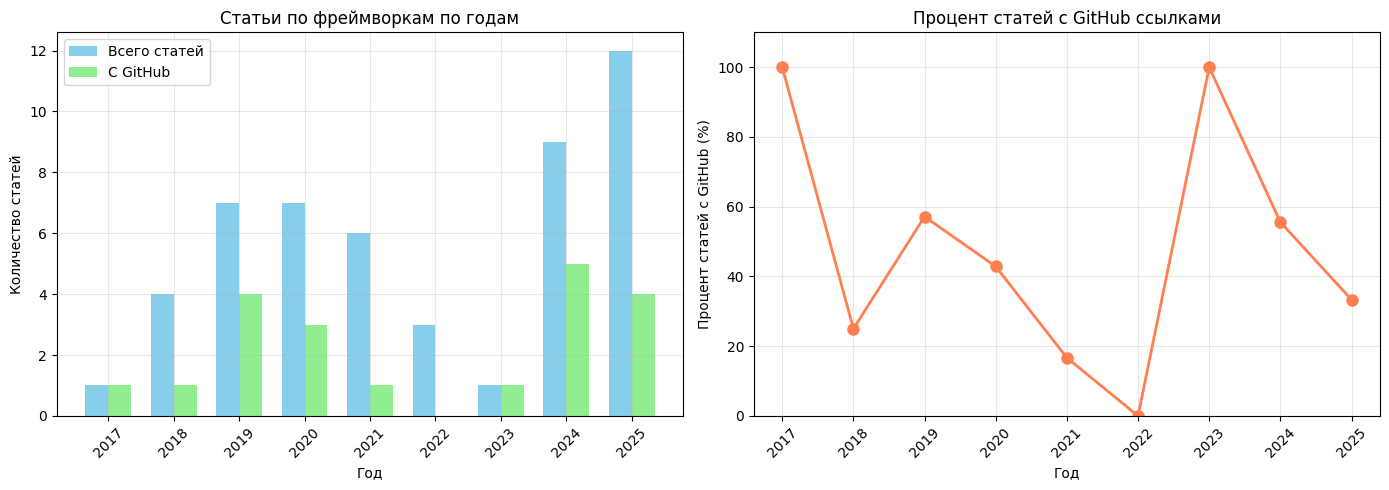

In [ ]:
# Визуализация результатов (опционально)
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    total_papers_by_year = analysis_result['total_papers_by_year']
    papers_with_github_by_year = analysis_result['papers_with_github_by_year']
    
    years = sorted(total_papers_by_year.keys())
    if years:
        totals = [total_papers_by_year.get(year, 0) for year in years]
        githubs = [papers_with_github_by_year.get(year, 0) for year in years]
        percentages = [(githubs[i] / totals[i] * 100) if totals[i] > 0 else 0 for i in range(len(years))]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # График 1: Количество статей по годам
        x = np.arange(len(years))
        width = 0.35
        ax1.bar(x - width/2, totals, width, label='Всего статей', color='skyblue')
        ax1.bar(x + width/2, githubs, width, label='С GitHub', color='lightgreen')
        ax1.set_xlabel('Год')
        ax1.set_ylabel('Количество статей')
        ax1.set_title('Статьи по фреймворкам по годам')
        ax1.set_xticks(x)
        ax1.set_xticklabels(years, rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # График 2: Процент статей с GitHub
        ax2.plot(years, percentages, marker='o', linewidth=2, markersize=8, color='coral')
        ax2.set_xlabel('Год')
        ax2.set_ylabel('Процент статей с GitHub (%)')
        ax2.set_title('Процент статей с GitHub ссылками')
        ax2.set_xticks(years)
        ax2.set_xticklabels(years, rotation=45)
        ax2.grid(True, alpha=0.3)
        ax2.set_ylim([0, max(percentages) * 1.1 if max(percentages) > 0 else 100])
        
        plt.tight_layout()
        plt.show()
    else:
        print("Нет данных для визуализации")
except ImportError:
    print("Matplotlib не установлен, пропускаем визуализацию")
except Exception as e:
    print(f"Ошибка при создании визуализации: {e}")
